### Importing libraries and data set

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from datetime import date
import statistics as stat
from pandasql import sqldf
import sqlite3
from scipy import stats as scstats
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as plot 

In [3]:
#Importing data
cars = pd.read_csv('car_prices (manipulated).csv')

C:\Users\cehoi\AppData\Local\Temp\ipykernel_67748\1363387469.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  cars = pd.read_csv('car_prices (manipulated).csv')


###

### Data Quality Checks

### Top 5 Rows



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015.0,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Bottom 5 Rows



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Overview



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  float64
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          546101 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493481 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558799 non-null  object 
dtypes: float64(5), object(11)
memory usage: 128.0+ MB


None

### Total Duplicates



489737

### Total Missing Values by Column



year            489738
make            500039
model           500137
trim            502474
body            502933
transmission    555094
vin             489738
state           489764
condition       501532
odometer        489832
color           490487
interior        490487
seller          489764
mmr             489750
sellingprice    489750
saledate        489776
dtype: int64

### Total Unique Entries by Column



year                34
make                81
model              935
trim              1960
body                43
transmission         2
vin             550322
state               38
condition           41
odometer        172280
color               20
interior            17
seller           14261
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

### Overview Descriptive Statistics



,year,condition,odometer,mmr,sellingprice
count,558837.000000,547043.000000,558743.000000,558825.000000,558825.000000
mean,2010.038927,30.672188,68320.437548,13769.372657,13611.301368
std,3.966864,13.403260,53398.058707,9679.742249,9749.515881
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### Unique Entries Chart



,index,0
0,year,34
1,make,81
2,model,935
3,trim,1960
4,body,43
5,transmission,2
6,vin,550322
7,state,38
8,condition,41
9,odometer,172280


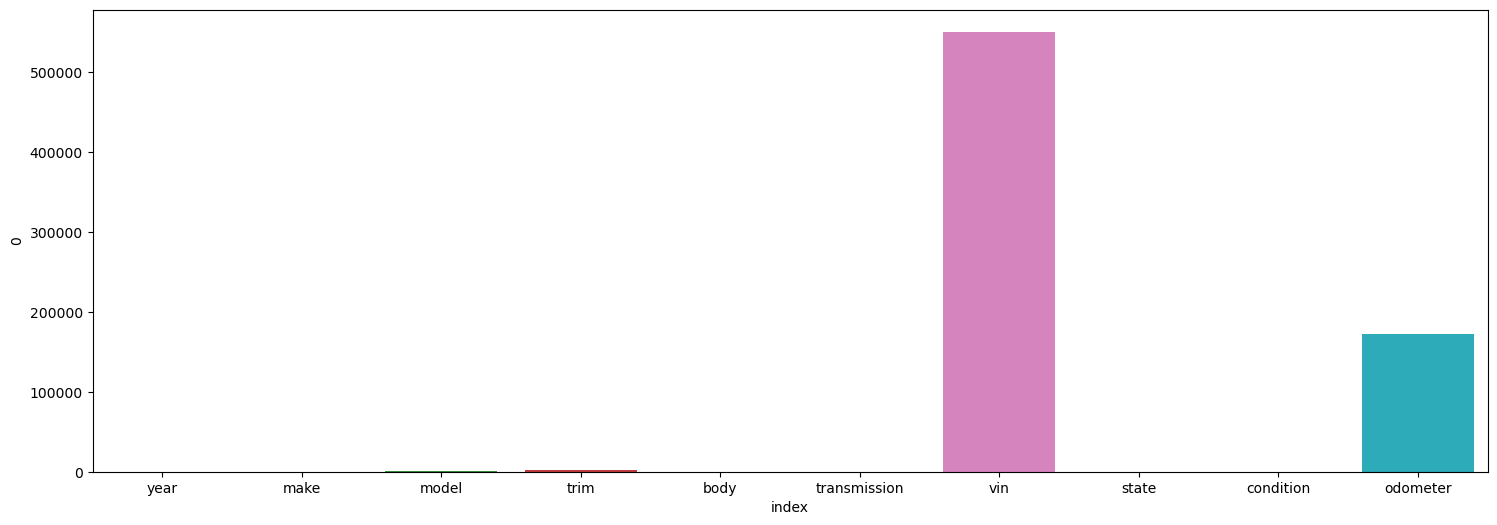

In [6]:
#Data quality checks using custom library
import dataquality as dq

dq.data_check(cars)

In [7]:
#Removing completely blank rows
cars.dropna(how = 'all', inplace = True)

In [8]:
#Converting saledate column to datetime data type
cars['saledate'] = pd.to_datetime(cars['saledate'], utc = True)
cars.head()

C:\Users\cehoi\AppData\Local\Temp\ipykernel_67748\796159874.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cars['saledate'] = pd.to_datetime(cars['saledate'], utc = True)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00
1,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00
3,2015.0,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00


In [9]:
#Creating column for sales year and sales month
cars['sale_year'] = cars['saledate'].dt.strftime('%Y')
cars['sale_month'] = cars['saledate'].dt.strftime('%b')
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,sale_month
0,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014,Dec
1,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014,Dec
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015,Jan
3,2015.0,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015,Jan
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014,Dec


In [10]:
#Rechecking data types
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558837 entries, 0 to 558836
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          558837 non-null  float64            
 1   make          548536 non-null  object             
 2   model         548438 non-null  object             
 3   trim          546101 non-null  object             
 4   body          545642 non-null  object             
 5   transmission  493481 non-null  object             
 6   vin           558837 non-null  object             
 7   state         558811 non-null  object             
 8   condition     547043 non-null  float64            
 9   odometer      558743 non-null  float64            
 10  color         558088 non-null  object             
 11  interior      558088 non-null  object             
 12  seller        558811 non-null  object             
 13  mmr           558825 non-null  float64           

###

### Data Cleaning/EDA

In [13]:
#Pulling back entries where car make is Saab
cars.loc[cars['make'] == 'Saab']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,sale_month
3951,2006.0,Saab,3-Sep,2.0T,Convertible,automatic,ys3fd79y766100305,ca,19.0,73926.0,black,gray,m l sim,5075.0,4700.0,2015-01-06 04:30:00+00:00,2015,Jan
4472,2004.0,Saab,3-Sep,Arc,Convertible,automatic,ys3fd79y046007039,ca,NaN,107532.0,red,—,mikes auto sales,2850.0,1600.0,2014-12-17 04:30:00+00:00,2014,Dec
4474,2004.0,Saab,3-Sep,Aero,Sedan,automatic,ys3fh49y941010070,ca,46.0,105592.0,gray,gray,stg auto group,2550.0,3400.0,2014-12-17 04:00:00+00:00,2014,Dec
4498,2004.0,Saab,3-Sep,Arc,Convertible,automatic,ys3fd79y446003382,ca,23.0,135511.0,gray,beige,land rover san jose,2150.0,2300.0,2014-12-16 04:30:00+00:00,2014,Dec
4531,2004.0,Saab,3-Sep,Linear,Sedan,automatic,ys3fb49s941027173,ca,2.0,1.0,gray,gray,axcess financial,4300.0,500.0,2015-01-13 23:10:00+00:00,2015,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554924,2005.0,Saab,9-2X,Linear,wagon,automatic,jf4gg61655h056338,ny,29.0,38275.0,silver,gray,adk auto brokers inc,2900.0,4000.0,2015-06-17 19:45:00+00:00,2015,Jun
556893,2011.0,Saab,3-Sep,2.0T,sedan,NaN,ys3fa4cy3b1307281,pa,43.0,25410.0,black,beige,adcock brothers inc,11600.0,12100.0,2015-06-18 19:00:00+00:00,2015,Jun
557057,2008.0,Saab,3-Sep,2.0T,convertible,automatic,ys3fb79y286002422,tx,41.0,67290.0,silver,black,capital one fleet,8425.0,8700.0,2015-06-17 20:30:00+00:00,2015,Jun
558194,2003.0,Saab,5-Sep,Arc 3.0t,sedan,NaN,ys3ed49z133043714,pa,25.0,189783.0,silver,black,r hollenshead auto sales inc,25.0,700.0,2015-06-18 19:00:00+00:00,2015,Jun


In [14]:
#Replacing Saab model "3-Sep" with "9-3" and "5-Sep" with "9-5"
cars['model'] = cars['model'].replace('3-Sep', '9-3')
cars['model'] = cars['model'].replace('5-Sep', '9-5')

#Reckecking Saab entries
cars.loc[cars['make'] == 'Saab'].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,sale_month
3951,2006.0,Saab,9-3,2.0T,Convertible,automatic,ys3fd79y766100305,ca,19.0,73926.0,black,gray,m l sim,5075.0,4700.0,2015-01-06 04:30:00+00:00,2015,Jan
4472,2004.0,Saab,9-3,Arc,Convertible,automatic,ys3fd79y046007039,ca,NaN,107532.0,red,—,mikes auto sales,2850.0,1600.0,2014-12-17 04:30:00+00:00,2014,Dec
4474,2004.0,Saab,9-3,Aero,Sedan,automatic,ys3fh49y941010070,ca,46.0,105592.0,gray,gray,stg auto group,2550.0,3400.0,2014-12-17 04:00:00+00:00,2014,Dec
4498,2004.0,Saab,9-3,Arc,Convertible,automatic,ys3fd79y446003382,ca,23.0,135511.0,gray,beige,land rover san jose,2150.0,2300.0,2014-12-16 04:30:00+00:00,2014,Dec
4531,2004.0,Saab,9-3,Linear,Sedan,automatic,ys3fb49s941027173,ca,2.0,1.0,gray,gray,axcess financial,4300.0,500.0,2015-01-13 23:10:00+00:00,2015,Jan


In [15]:
#Making entries in state column all caps
cars['state'] = cars['state'].str.upper()
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,sale_month
0,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,CA,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00,2014,Dec
1,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,CA,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00,2014,Dec
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,CA,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015,Jan
3,2015.0,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,CA,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015,Jan
4,2014.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,CA,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014,Dec


###

### Data Distribution/Visualizations:

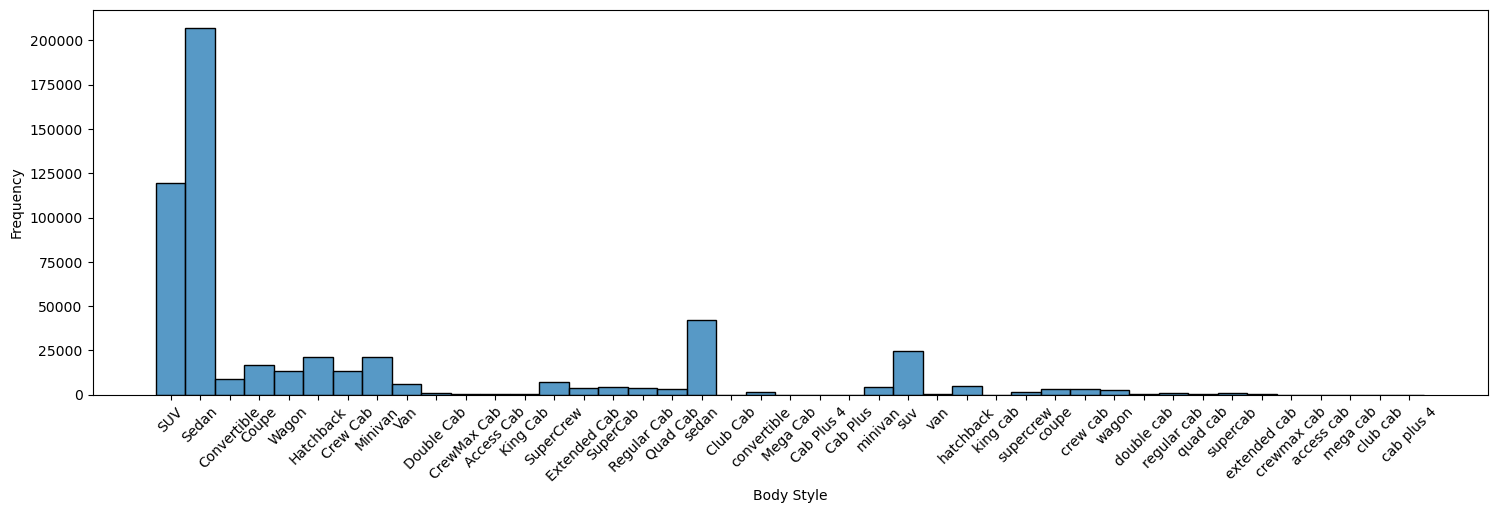

In [18]:
#Distribution of body type
plt.figure(figsize = (18, 5))

sns.histplot(data = cars, x = 'body')

plt.xlabel('Body Style')
plt.ylabel('Frequency')

plt.tick_params(axis = 'x', labelrotation = 45)

plt.show()

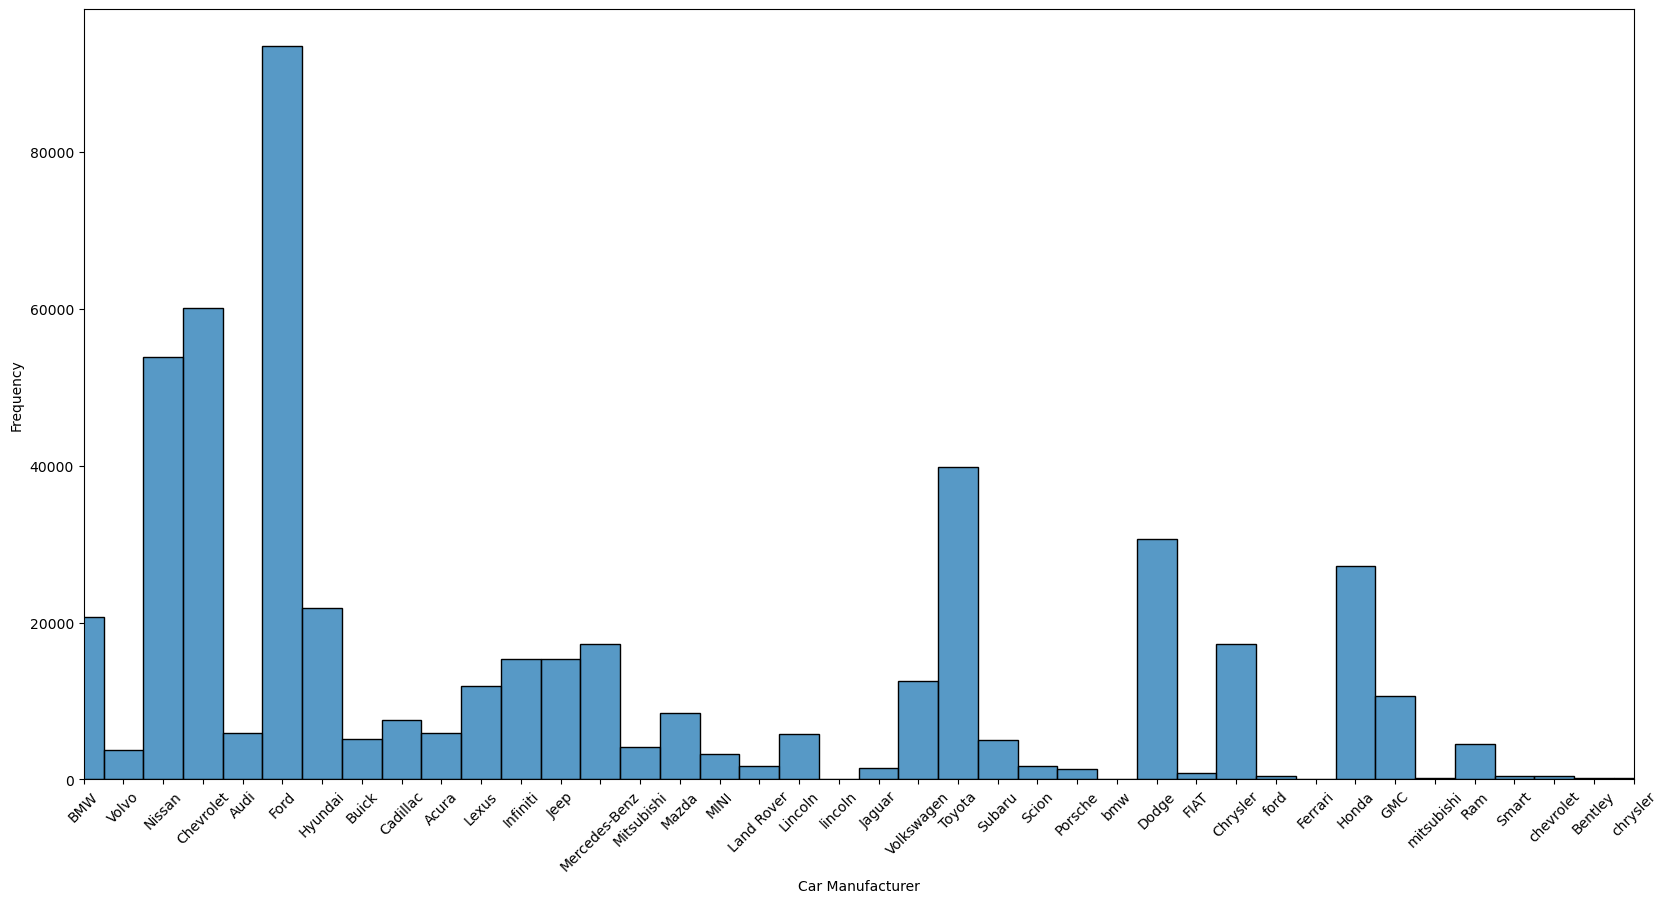

In [19]:
#Distribution of make
plt.figure(figsize = (20, 10))

sns.histplot(data = cars, x = 'make')

plt.xlabel('Car Manufacturer')
plt.ylabel('Frequency')

plt.tick_params(axis = 'x', labelrotation = 45)

plt.xlim(1, 40)

plt.show()

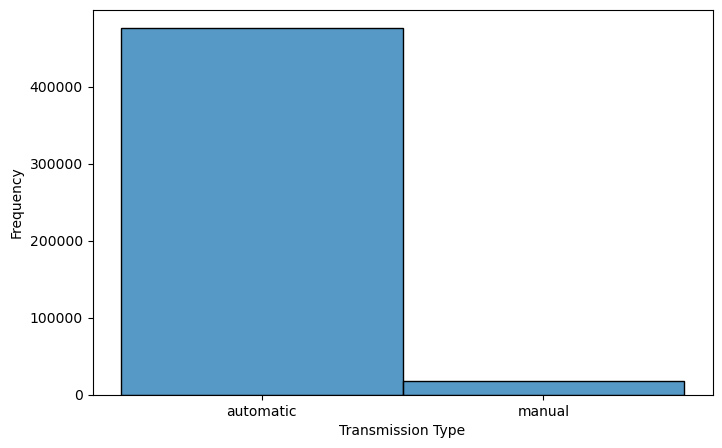

In [20]:
#Distribution of transmission type
plt.figure(figsize = (8, 5))

sns.histplot(data = cars, x = 'transmission')

plt.xlabel('Transmission Type')
plt.ylabel('Frequency')


plt.show()

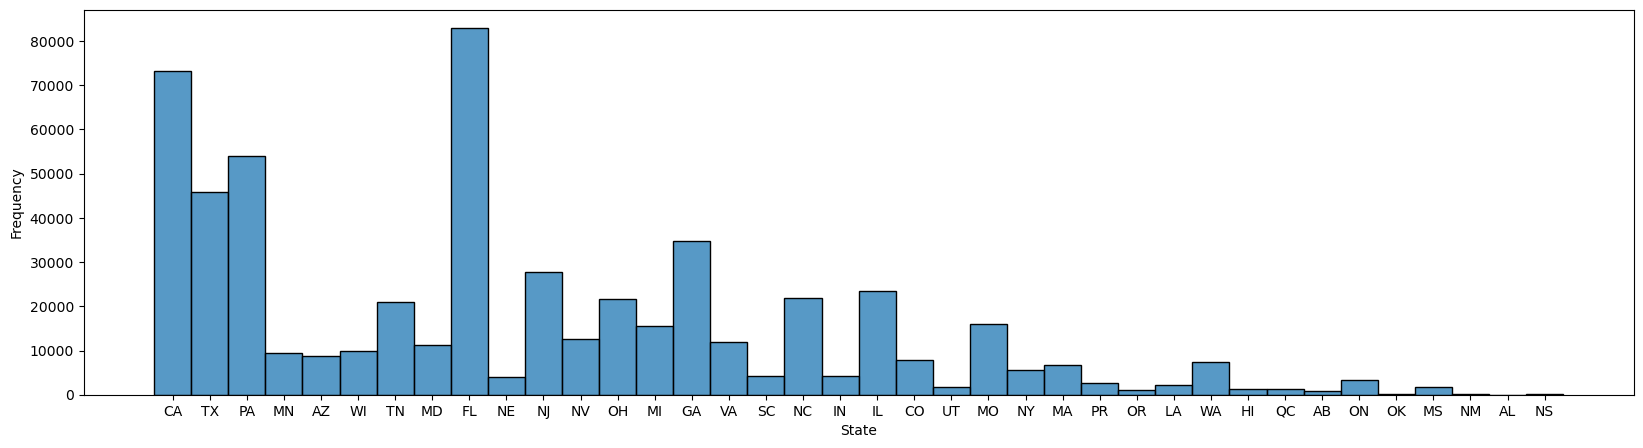

In [21]:
#Distribution of sales by state
plt.figure(figsize = (20, 5))

sns.histplot(data = cars, x = 'state')

plt.xlabel('State')
plt.ylabel('Frequency')


plt.show()

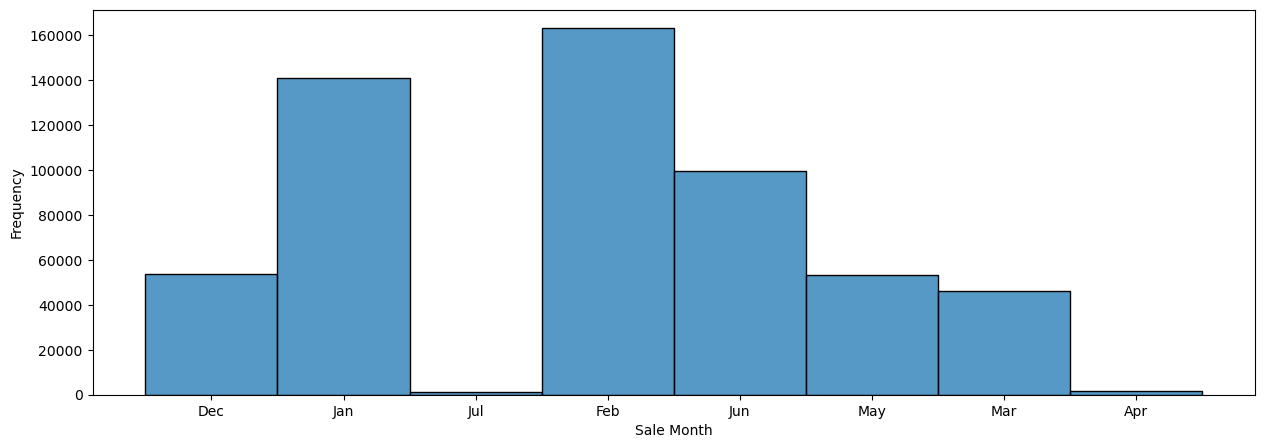

In [22]:
#Distribution of sales by month
plt.figure(figsize = (15, 5))

sns.histplot(data = cars, x = 'sale_month')

plt.xlabel('Sale Month')
plt.ylabel('Frequency')


plt.show()

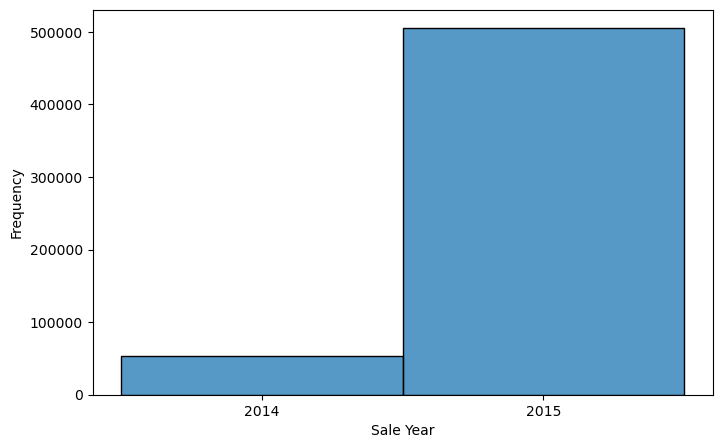

In [23]:
#Distribution of sales by year
plt.figure(figsize = (8, 5))

sns.histplot(data = cars, x = 'sale_year')

plt.xlabel('Sale Year')
plt.ylabel('Frequency')


plt.show()

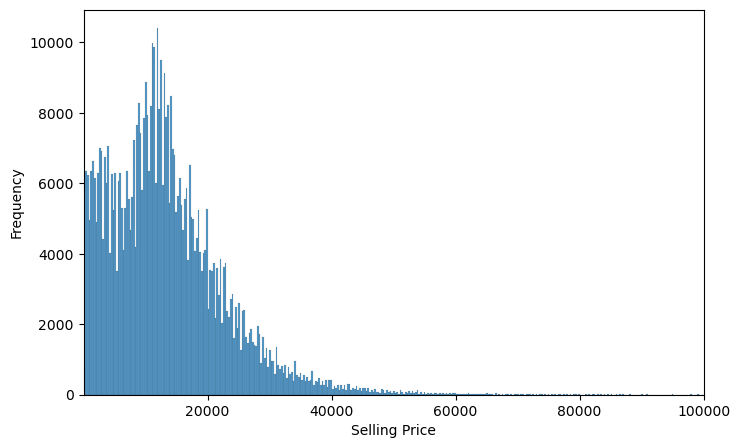

In [24]:
#Distribution of selling price
plt.figure(figsize = (8, 5))

sns.histplot(data = cars, x = 'sellingprice')

plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.xlim(1, 100000)

plt.show()

###

### Correlation Analysis:

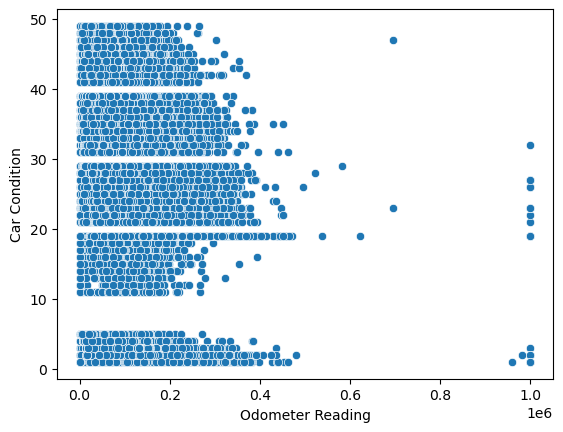

Correlation Coefficient:
-0.318142748068946


In [27]:
#Looking for correlation between odometer reading and condition
sns.scatterplot(data = cars, x = 'odometer', y = 'condition')

plt.xlabel('Odometer Reading')
plt.ylabel('Car Condition')

plt.show() 

#Calculating correlation coefficient
corr_coeff = cars['odometer'].corr(cars['condition'])
print('Correlation Coefficient:')
print(corr_coeff) #weak negative correlation

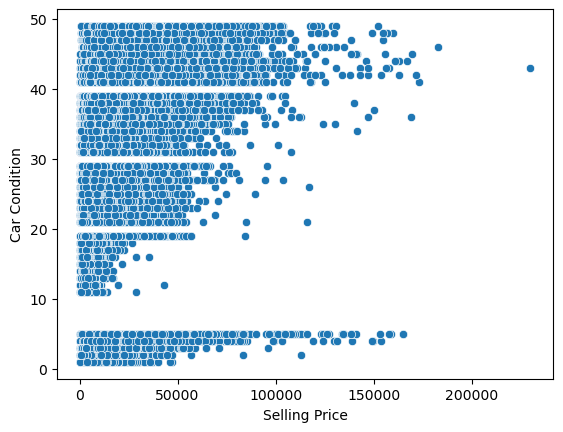

Correlation Coefficient:
0.3219386392923348


In [28]:
#Looking for correlation between condition and selling price
sns.scatterplot(data = cars, x = 'sellingprice', y = 'condition')

plt.xlabel('Selling Price')
plt.ylabel('Car Condition')

plt.show() 

#Calculating correlation coefficient
corr_coeff = cars['sellingprice'].corr(cars['condition'])
print('Correlation Coefficient:')
print(corr_coeff) #weak positive correlation

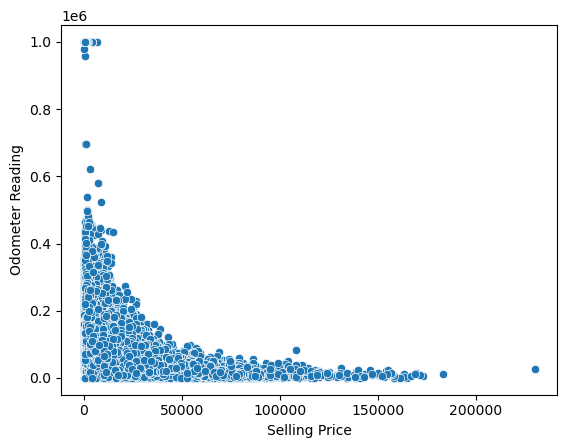

Correlation Coefficient:
-0.5823908643189072


In [29]:
#Looking for correlation between odometer reading and selling price
sns.scatterplot(data = cars, x = 'sellingprice', y = 'odometer')

plt.xlabel('Selling Price')
plt.ylabel('Odometer Reading')

plt.show() 

#Calculating correlation coefficient
corr_coeff = cars['sellingprice'].corr(cars['odometer'])
print('Correlation Coefficient:')
print(corr_coeff) #moderate negative correlation: generally, selling price tends to be higher when the odometer reading is lower

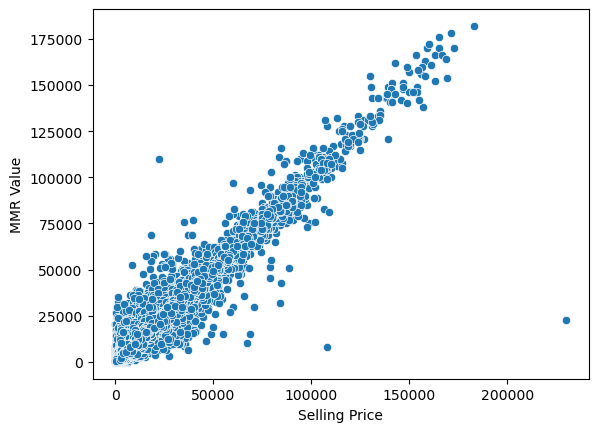

Correlation Coefficient:
0.9836332099758597


In [30]:
#Looking for correlation between mmr value and selling price
sns.scatterplot(data = cars, x = 'sellingprice', y = 'mmr')

plt.xlabel('Selling Price')
plt.ylabel('MMR Value')

plt.show() 

#Calculating correlation coefficient
corr_coeff = cars['sellingprice'].corr(cars['mmr'])
print('Correlation Coefficient:')
print(corr_coeff) #strong positive correlation: higher the mmr value, the higher the selling price

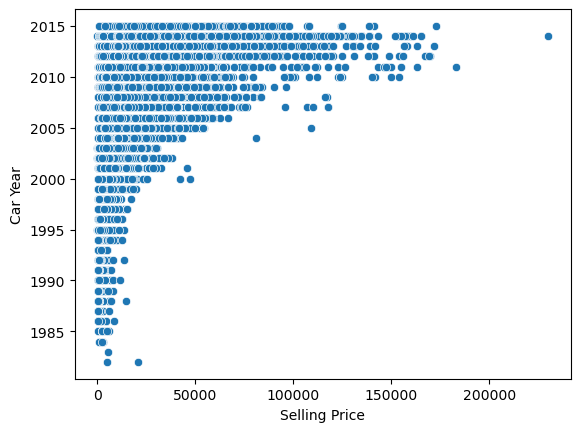

Correlation Coefficient:
0.5864721891621275


In [31]:
#Looking for correlation between car year and selling price
sns.scatterplot(data = cars, x = 'sellingprice', y = 'year')

plt.xlabel('Selling Price')
plt.ylabel('Car Year')

plt.show() 

#Calculating correlation coefficient
corr_coeff = cars['sellingprice'].corr(cars['year'])
print('Correlation Coefficient:')
print(corr_coeff) #moderate positive correlation: generally, the newer the car, the higher the selling price

###

### Outlier Analysis:

In [34]:
#Looking for outliers in selling price using IQR method
q1 = cars['sellingprice'].quantile(0.25)
q3 = cars['sellingprice'].quantile(0.75)
IQR = q3 - q1
print('Interquartile Range: ', IQR)

low = q1 - (1.5 * IQR)
print('Lower Fence: ', low)

upper = q3 + (1.5 * IQR)
print('Upper Fence: ', upper)

Interquartile Range:  11300.0
Lower Fence:  -10050.0
Upper Fence:  35150.0


In [35]:
#Looking for number of sales with a selling price below the lower fence
below_lowfence = cars.query('sellingprice < -10050')
print('Number of data points below lower fence: ', len(below_lowfence))

Number of data points below lower fence:  0


In [36]:
#Looking for number of sales with a selling price above the upper fence
above_upperfence = cars.query('sellingprice > 35150')
print('Number of data points above upper fence: ', len(above_upperfence))

Number of data points above upper fence:  16354


###

### Calculations/Data Aggregation:

In [39]:
#Looking for number of sales where the selling price was below $100
cheap_sales = cars.query('sellingprice < 100')
print('Number of Sales Below $100: ', len(cheap_sales))
print(' ')
display(cheap_sales)

Number of Sales Below $100:  4
 


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,sale_month
7566,2002.0,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,CA,2.0,NaN,white,gray,laa leasing,7850.0,1.0,2015-02-04 20:00:00+00:00,2015,Feb
48453,2003.0,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,GA,21.0,1.0,black,black,peoples credit company inc,7325.0,1.0,2015-01-06 01:30:00+00:00,2015,Jan
293223,2014.0,Ford,E-Series Van,E-250,Van,automatic,1ftne2ew6eda13643,TX,41.0,31886.0,white,gray,u-haul,20800.0,1.0,2015-02-11 19:00:00+00:00,2015,Feb
348252,1995.0,Isuzu,Rodeo,LS,SUV,NaN,4s2cm58v9s4375559,VA,1.0,254132.0,red,gray,automotive remarketing inc,375.0,1.0,2015-03-03 17:05:00+00:00,2015,Mar


In [40]:
#Calculating average selling price by sales month
avg_sale_price_per_month = cars.groupby('sale_month')['sellingprice'].mean().sort_values(ascending = False).reset_index(name = 'avg_sales_price')
display(avg_sale_price_per_month.round(2))

,sale_month,avg_sales_price
0,Jul,17049.18
1,Jun,15033.57
2,May,14306.79
3,Feb,13608.23
4,Mar,13440.82
5,Jan,13291.77
6,Dec,11293.61
7,Apr,10149.54


In [41]:
#Calculating number of sales per month
sales_per_month = cars.groupby('sale_month').size().sort_values(ascending = False).reset_index(name = "number_of_sales")
display(sales_per_month)

,sale_month,number_of_sales
0,Feb,163053
1,Jan,140815
2,Jun,99276
3,Dec,53520
4,May,53098
5,Mar,46342
6,Apr,1438
7,Jul,1257


In [42]:
#Calculating top ten average sales per make
top_10_avg_sales = cars.groupby('make')['sellingprice'].mean().sort_values(ascending = False).reset_index(name = "avg_sales_price")
(top_10_avg_sales.round(2)).head(10)

,make,avg_sales_price
0,Rolls-Royce,153488.24
1,Ferrari,127210.53
2,Lamborghini,112625.00
3,Bentley,74367.67
4,airstream,71000.00
5,Tesla,67054.35
6,Aston Martin,54812.00
7,Fisker,46461.11
8,Maserati,45320.30
9,Lotus,40800.00


In [43]:
#Calculating top ten states with the most sales
top_10_states = cars.groupby('state').size().sort_values(ascending = False).reset_index(name = "number_of_sales")
top_10_states.head(10)

,state,number_of_sales
0,FL,82945
1,CA,73148
2,PA,53907
3,TX,45913
4,GA,34750
5,NJ,27784
6,IL,23486
7,NC,21845
8,OH,21575
9,TN,20895


###

### Exporting Data

In [46]:
#Exporting cleaned data with added columns as csv
cars.to_csv('car_data (python cleaned).csv')